## Deep learning: Chapter 2


Example:  Classify handwritten digits

* grayscale images, 28x28 pixels into 10 categories
* [MNISt](https://en.wikipedia.org/wiki/MNIST_database) dataset: 60k training images, 10k test images


Terminology:

* **Class**: a category in a classification problem 
* **Sample**: datapoints
* **Label** class associatied with a specific sample

MNIST database is preloaded in KERASin set of four Numpy arrays

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

* `train_images` and `train_labels` frm the training set
* `test_images` and `test_labels` is test set on which model will be tested

In [3]:
print(f"Shape train_image = {train_images.shape}")
print(f"Length train_labels = {len(train_labels)}")
print(f"Shape test_images= {test_images.shape}")
print(f"Length test_labels = {len(test_labels)}")

Shape train_image = (60000, 28, 28)
Length train_labels = 60000
Shape test_images= (10000, 28, 28)
Length test_labels = 10000


***Workflow:*** 

1. feed neuronal network training data
2. associate images with labels
3. produce predictions for test images
4. verify whether predictions match test labels

In [4]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation = 'softmax'))

* layer: is a filter
* layer extract representations of data fed into them.
* layers are chained

Network above consists of a sequence of two dense layers that are *densely* connected (or *fully* connected) neural layers. The second layer is a 10 way *softmax* layer which rturns 10 probability scores (summing to 1). Each score will give probability that current digit belongs to one of the 10 digit classes.

Make network ready for training need to pick three more things as part of the *compilation* step: 

* optimizer (method to update network)
* Loss function (how network measures performance on training data)
* Metrics to monitor during training and testing (here: accuracy of classification)

In [5]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

* reshape images into a `float32` array of shape (60000, 28*28)
* rescale 8 bit images into values in interval `[0, 1]`

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28 *28))
test_images = test_images.astype('float32')/255

* categorically encode labels

In [7]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

* train network.  Call network's fit method

In [8]:
network.fit(train_images, train_labels, epochs =5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.2571 - accuracy: 0.9245
Epoch 2/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.1033 - accuracy: 0.9682
Epoch 3/5
60000/60000 [==============================] - 4s 66us/step - loss: 0.0686 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0496 - accuracy: 0.9848
Epoch 5/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0377 - accuracy: 0.9880


In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


10000/10000 [==============================] - 0s 36us/step
test_acc: 0.9819999933242798


This is lower than the training set accuracy.  This is an example of *overfitting*. 

### Data representations for neural networks

Tensors:

* rank 0: scalar `0`
* rank 1: vector `[1,4,5,7]`
* rank 2: array  `[[11,12,13], [21, 22, 23]]`
* rank n: has n axes

note: vector `[1,4,5,7]` has 4 dimensions, but is a tensor of rank 1 (often one speaks, inaccurately, of a one dimensional tensor)

Types of data:

* Vector data: e.g. dataset of dext documents where each is represented by the counts of how many times each word in a dictionary appears in it.  e.g. tensor of shape `(500, 20000)` might describe 500 documents with dictionary of 20000 words.

* Time series data: E.g.stock prices as a tensor of rank 3: 250 days with values every minute (390 working minutes per day), recording low, high and current price for each minute `(250, 390, 3)`

* Image data: tensor of rank 4: e.g. 128 images, 256 x 256 pixels, 3 colour channels. `(128, 256, 256, 3)`. note Tensorflow convention for order is `(samples, height, width, color_depth)` 

### Tensor attributes

* Number of axes (rank)
* shape: dimension of tensor along each axis
* Data type (usually `dtype` in python libraries)

### Broadcasting

Means stretching dimensions of lower rank tensor to those of higher rank tensor for efficient computation.

See [broadcasting article](https://numpy.org/devdocs/user/theory.broadcasting.html)

* works from last axis backward to front
* final dimensions must match

E.g. adding `1` to `[1,2,3]` is the same as broadcasting `1` to `[1,1,1]` and adding `[1,1,1]` to `[1,2,3]`.

In [5]:
import numpy as np

In [19]:
a = np.arange(1,4)
print(a)


[1 2 3]


ValueError: cannot reshape array of size 3 into shape (3,2)

In [6]:
x = np.arange(1,11).astype(float)
y = np.ones((2, 3, 10)).astype(float)
y[:]=x
print('y=\n',y)

print('\nrank of y:', y.ndim)

print('\nshape of y:', y.shape)

y=
 [[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]

 [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]]

rank of y: 3

shape of y: (2, 3, 10)


In [7]:
print('shape of train_images = ', train_images.shape)  #Note: above we have vectorised 28x28 images

shape of train_images =  (60000, 784)


In [8]:
y = np.reshape(train_images, (60000, 28,28)) #reshape into tensor of rank 3 (sample, height, width)
print('shape of y =', y.shape)

shape of y = (60000, 28, 28)


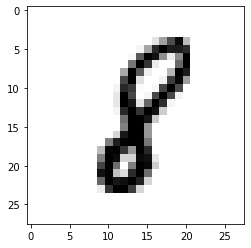

In [13]:
import matplotlib.pyplot as plt

digit = y[34001,:,:]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()